<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Изучение-основной-информации-о-датасете" data-toc-modified-id="Изучение-основной-информации-о-датасете-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение основной информации о датасете</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Создание-новых-признаков" data-toc-modified-id="Создание-новых-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Создание новых признаков</a></span></li><li><span><a href="#Лемматизация-и-очистка-текста" data-toc-modified-id="Лемматизация-и-очистка-текста-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Лемматизация и очистка текста</a></span></li><li><span><a href="#Визуализация-облака-слов" data-toc-modified-id="Визуализация-облака-слов-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Визуализация облака слов</a></span></li><li><span><a href="#Разбиение-на-выборки" data-toc-modified-id="Разбиение-на-выборки-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Разбиение на выборки</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-preprocessing-шага-для-pipeline'а" data-toc-modified-id="Подготовка-preprocessing-шага-для-pipeline'а-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка preprocessing-шага для pipeline'а</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Градиентный бустинг</a></span></li></ul></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Настройка-порога" data-toc-modified-id="Настройка-порога-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Настройка порога</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Проверка-результатов-на-тестовом-наборе-данных" data-toc-modified-id="Проверка-результатов-на-тестовом-наборе-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка результатов на тестовом наборе данных</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Альтернатива----модель-BERT" data-toc-modified-id="Альтернатива----модель-BERT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Альтернатива  - модель BERT</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ токсичности комментариев

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучим модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок.

Построим модель со значением метрики качества *F1* не меньше 0.75. 


**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

In [1]:
!pip install lightgbm -q
!pip install spacy -q
!pip install wordcloud -q

# Импортируем стандартные библиотеки
import warnings
import re
import os
import sys

# Импортируем сторонние библиотеки
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Импортируем модели, метрики, вспомогательные инструменты и функции
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers.pipelines import TextClassificationPipeline
from nltk.corpus import stopwords as nltk_stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from lightgbm import LGBMClassifier
from tqdm import notebook

!{sys.executable} -m spacy download en

nltk.download('stopwords')
nltk.download('vader_lexicon')

pd.set_option('display.max_columns', None)

stopwords = list(nltk_stopwords.words('english'))

random_state = 42

2023-04-21 15:57:13.850536: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 15:57:14.597374: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-21 15:57:14.597433: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-21 15:57:14.597439: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

2023-04-21 15:57:18.051726: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 15:57:18.741417: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-21 15:57:18.741477: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-21 15:57:18.741485: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

[nltk_data] Downloading package stopwords to /home/n3m0/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/n3m0/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Подготовка

### Изучение основной информации о датасете

Откроем файл и сохраним его в переменной `df`, получим основную информацию с помощью метода .info() и построим гистограммы для всех признаков датасета.

In [2]:
try:
    df = pd.read_csv('toxic_comments.csv', index_col=0)
except:
    df = pd.read_csv('/datasets/toxic_comments.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [4]:
df.sample(5)

,text,toxic
157769,you were wrong to delete Diahn williams. Acti...,0
23488,"""::::""""Projectively extended real numbers"""" is...",0
123317,"I'll sort it tomorrow, don't have time now. 81...",0
103603,"OK, let's get it straight, I have never earned...",0
11492,"""\n\n Please do not vandalize pages, as you di...",0


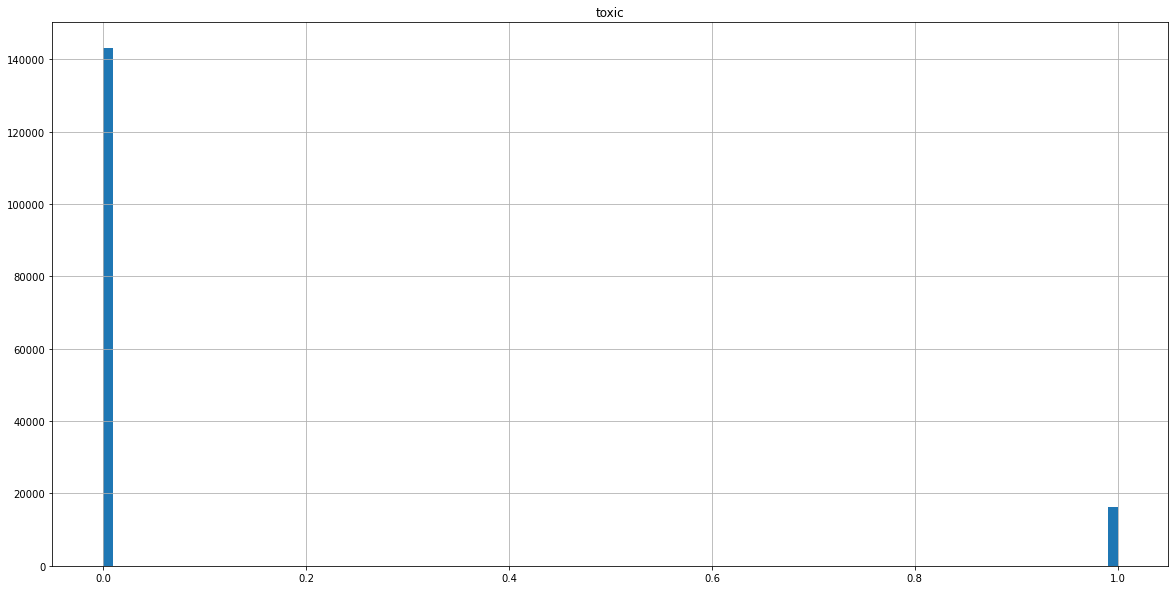

In [5]:
df.hist(figsize=(20, 10), bins=100)
plt.show()

In [6]:
df.describe()

,toxic
count,159292.000000
mean,0.101612
std,0.302139
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


---
**Вывод:** изучив основную информацию о датасете, можно утверждать, что
- в данных отсутствуют пропуски;
- на всякий случай имеет смысл проверить данные на дубликаты;
- текст комментариев необходимо будет лемматизировать и очистить от спецсимволов;
- в данных присутствует дисбаланс классов 9 к 1 - будем учитывать это при построении моделей;
- будем векторизовывать наш текст методикой TF-IDF в pipeline'е.

### Поиск дубликатов

Проведём поиск дубликатов.

In [7]:
df.duplicated().sum()

0

Дубликатов не обнаружено.

### Создание новых признаков

Создадим новые признаки через SentimentIntensityAnalyzer из пакета VADER. Эти признаки будут оценивать настроение комментариев путём анализа слов и частей речи, а также синтаксиса. Вот почему нам важно создать данные признаки до лемматизации и очистки текста.

In [8]:
print(df['text'][0]) # Пример комментария

sia = SentimentIntensityAnalyzer()

sia.polarity_scores(df['text'][0]) # Пример оценки настроения комментария

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.5574}

In [9]:
df[['neg', 'neu', 'pos', 'compound']] = df['text'].apply(sia.polarity_scores).apply(pd.Series)

In [10]:
df[df['toxic'] == 0].head(15)

,text,toxic,neg,neu,pos,compound
0,Explanation\nWhy the edits made under my usern...,0,0.000,0.897,0.103,0.5574
1,D'aww! He matches this background colour I'm s...,0,0.099,0.743,0.158,0.2942
2,"Hey man, I'm really not trying to edit war. It...",0,0.083,0.849,0.068,-0.1779
3,"""\nMore\nI can't make any real suggestions on ...",0,0.022,0.916,0.062,0.5106
4,"You, sir, are my hero. Any chance you remember...",0,0.000,0.663,0.337,0.6808
5,"""\n\nCongratulations from me as well, use the ...",0,0.000,0.464,0.536,0.7964
7,Your vandalism to the Matt Shirvington article...,0,0.129,0.773,0.099,-0.1779
8,Sorry if the word 'nonsense' was offensive to ...,0,0.109,0.891,0.000,-0.8020
9,alignment on this subject and which are contra...,0,0.000,1.000,0.000,0.0000
10,"""\nFair use rationale for Image:Wonju.jpg\n\nT...",0,0.019,0.877,0.104,0.9910


In [11]:
df[df['toxic'] == 1].head(15)

,text,toxic,neg,neu,pos,compound
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,0.531,0.469,0.000,-0.7783
12,Hey... what is it..\n@ | talk .\nWhat is it......,1,0.130,0.673,0.197,0.3034
16,"Bye! \n\nDon't look, come or think of comming ...",1,0.000,1.000,0.000,0.0000
42,You are gay or antisemmitian? \n\nArchangel WH...,1,0.156,0.844,0.000,-0.9548
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0.549,0.451,0.000,-0.8070
44,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0.117,0.775,0.108,0.1289
51,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0.467,0.533,0.000,-0.9614
55,Stupid peace of shit stop deleting my stuff as...,1,0.537,0.358,0.105,-0.9381
56,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0.203,0.581,0.215,0.0516
58,My Band Page's deletion. You thought I was gon...,1,0.125,0.780,0.095,-0.9230


Новые признаки созданы.

### Лемматизация и очистка текста

Подготовим функции для лемматизации и очистки текста от спецсимволов.

In [12]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatize(text):
    
    doc = nlp(text)
    lemm_text = " ".join([token.lemma_ for token in doc]).lower()
    
    return lemm_text


def clear_text(text):
    
    cleared_text = re.sub(r'[^a-zA-Z ]', ' ', text) 
    cleared_text = ' '.join(cleared_text.split())
    
    return cleared_text

In [13]:
lemmatize(clear_text(df.loc[0, 'text']))

'explanation why the edit make under my username hardcore metallica fan be revert they weren t vandalism just closure on some gas after i vote at new york dolls fac and please don t remove the template from the talk page since i m retire now'

Загрузим предварительно лемматизированный и очищенный текст. Если предварительного датасета не существует - очистим и лемматизируем текущий и сохраним его в файл.

In [14]:
try:
    df = pd.read_csv('toxic_lemm.csv', index_col=0)
except:
    df['lemm_text'] = df['text'].apply(lambda x: lemmatize(clear_text(x)))
    df.to_csv('toxic_lemm.csv')

In [15]:
df.head()

,text,toxic,neg,neu,pos,compound,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,0.000,0.897,0.103,0.5574,explanation why the edit make under my usernam...
1,D'aww! He matches this background colour I'm s...,0,0.099,0.743,0.158,0.2942,d aww he match this background colour i m seem...
2,"Hey man, I'm really not trying to edit war. It...",0,0.083,0.849,0.068,-0.1779,hey man i m really not try to edit war it s ju...
3,"""\nMore\nI can't make any real suggestions on ...",0,0.022,0.916,0.062,0.5106,more i can t make any real suggestion on impro...
4,"You, sir, are my hero. Any chance you remember...",0,0.000,0.663,0.337,0.6808,you sir be my hero any chance you remember wha...


### Визуализация облака слов

Визуализируем облака слов для токсичных и нетоксичных комментариев, чтобы понимать, какие слова наиболее точно характеризуют разницу между комментариями.

In [16]:
df_wordcloud_toxic = ' '.join(map(str, df[df['toxic'] == 1].lemm_text))
df_wordcloud_nontoxic = ' '.join(map(str, df[df['toxic'] == 0].lemm_text))

Облако слов для токсичных комментариев:

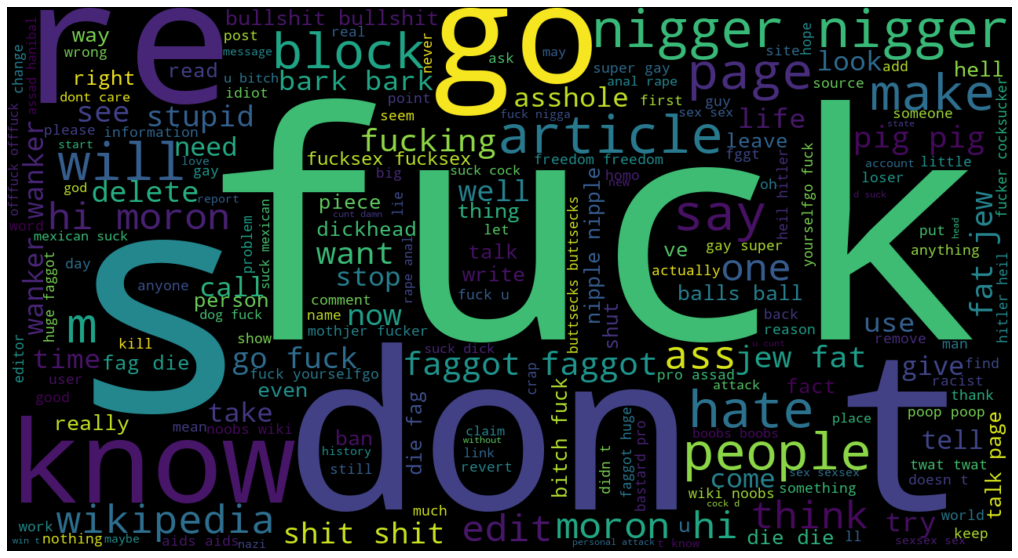

In [17]:
wordcloud_toxic = WordCloud(width=1280, height=720).generate(df_wordcloud_toxic)

fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(wordcloud_toxic, interpolation='bilinear', aspect='auto')
ax.axis("off")
plt.show()

Облако слов для нетоксичных комментариев:

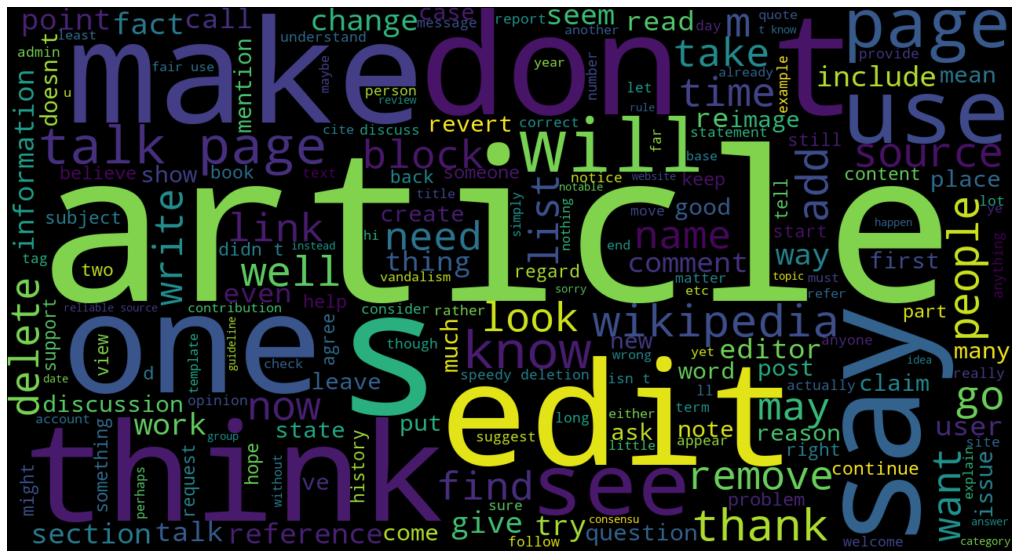

In [18]:
wordcloud_nontoxic = WordCloud(width=1280, height=720).generate(df_wordcloud_nontoxic)

fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(wordcloud_nontoxic, interpolation='bilinear', aspect='auto')
ax.axis("off")
plt.show()

In [19]:
del df_wordcloud_toxic, df_wordcloud_nontoxic

### Разбиение на выборки

Разобьем корпус в три выборки - обучающую, валидационную и тестовую в соотношении 8:1:1 с параметром stratify для сохранения доли классов в выборках.

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(
                                        df.drop(['toxic', 'text'], axis=1),
                                        df['toxic'],
                                        train_size=0.8,
                                        random_state=random_state,
                                        stratify=df['toxic'])

X_valid, X_test, y_valid, y_test = train_test_split(
                                        X_temp,
                                        y_temp,
                                        train_size=0.5,
                                        random_state=random_state,
                                        stratify=y_temp)

X_train.shape, X_valid.shape, X_test.shape

((127433, 5), (15929, 5), (15930, 5))

In [21]:
print(f'Доля меток со значением "1" обучающего набора: {y_train.mean()}')
print('-' * 37)
print(f'Доля меток со значением "1" валидационного набора: {y_valid.mean()}')
print('-' * 37)
print(f'Доля меток со значением "1" тестового набора: {y_test.mean()}')

Доля меток со значением "1" обучающего набора: 0.10161418156992302
-------------------------------------
Доля меток со значением "1" валидационного набора: 0.1015757423567079
-------------------------------------
Доля меток со значением "1" тестового набора: 0.10163214061519146


---
**Вывод:** завершив этап подготовки данных, мы
- не обнаружили в данных пропуски;
- проверили данные на дубликаты - их нет;
- создали 4 новых признака с помощью SentimentIntensityAnalyzer, оценивающие настроение текста;
- лемматизировали и очистили текст от спецсимволов;
- визуализировали облака слов для токсичных и нетоксичных комментариев;
- разбили данные на обучающую, валидационную и тестовую выборки в соотношении 8:1:1;
- приняли решение векторизовывать наш текст методикой TF-IDF в pipeline'е.

## Обучение

### Подготовка preprocessing-шага для pipeline'а

Подготовим наш препроцессор с TF-IDF векторизатором и стандартизацией числовых признаков для pipeline'ов.

In [22]:
numeric_features = ['neg', 'neu', 'pos', 'compound'] # числовые признаки

preprocessor = ColumnTransformer( # препроцессор, комбинированный из наших трансформеров
    transformers=[
        ('num', StandardScaler(), numeric_features), # Трансформер со стандартизацией для числовых признаков
        ('text', TfidfVectorizer(stop_words=stopwords), 'lemm_text') # Векторизатор tf-idf для текстовых признаков
    ]
)


### Обучение моделей

Поскольку у нас довольно объёмный датасет - ~160 тыс. строк, а каждый комментарий ещё и векторизован в большую размерность, нам имеет смысл обучать в данном проекте только самые быстрые модели, не используя кросс-валидацию.

Рассмотрим следующие модели:
- логистическую регрессию;
- градиентный бустинг lgbm.

Мы будем подбирать модель с лучшим ROC-AUC показателем, чтобы затем настроить порог (threshold), который даст нам наибольшую F1-меру.

In [23]:
# Сводная таблица
model_list = []
roc_auc_list = []
f1_list = []

#### Логистическая регрессия

In [24]:
%%time

lr_best = None
C_best = None
solver_best = None
roc_auc_best_lr = 0
f1_best_lr = 0

for solver in ['lbfgs', 'sag', 'saga']:
    for C in [1.0, 1.5, 5.0]:

        lr_pipe = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('model', LogisticRegression(random_state=random_state,
                                             solver=solver,
                                             max_iter=400,
                                             C=C,
                                             class_weight='balanced'))
        ])
        lr_pipe.fit(X_train, y_train)
        
        predictions_valid = lr_pipe.predict(X_valid)
        roc_auc = roc_auc_score(y_valid, predictions_valid)
        f1 = f1_score(y_valid, predictions_valid)
        
        if roc_auc > roc_auc_best_lr:
            roc_auc_best_lr = roc_auc
            f1_best_lr = f1
            C_best = C
            solver_best = solver
            lr_best = lr_pipe

/home/n3m0/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/n3m0/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


CPU times: user 7min 11s, sys: 5.62 s, total: 7min 16s
Wall time: 3min 25s


In [25]:
print('Лучшие гиперпараметры:')
lr_best

Лучшие гиперпараметры:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['neg', 'neu', 'pos',
                                                   'compound']),
                                                 ('text',
                                                  TfidfVectorizer(stop_words=['i',
                                                                              'me',
                                                                              'my',
                                                                              'myself',
                                                                              'we',
                                                                              'our',
                                                                              'ours',
                                                                              'ourselves',
                                                                              'you',
                                                                              "you're",
                                                                              "you've",
                                                                              "you'll",
                                                                              "you'd",
                                                                              'your',
                                                                              'yours',
                                                                              'yourself',
                                                                              'yourselves',
                                                                              'he',
                                                                              'him',
                                                                              'his',
                                                                              'himself',
                                                                              'she',
                                                                              "she's",
                                                                              'her',
                                                                              'hers',
                                                                              'herself',
                                                                              'it',
                                                                              "it's",
                                                                              'its',
                                                                              'itself', ...]),
                                                  'lemm_text')])),
                ('model',
                 LogisticRegression(C=1.5, class_weight='balanced',
                                    max_iter=400, random_state=42))])

In [26]:
model_list.append('Logistic regression')
roc_auc_list.append(roc_auc_best_lr)
f1_list.append(f1_best_lr)

#### Градиентный бустинг

In [27]:
%%time

lgbm_best = None
max_depth_best = None
n_estimators_best = None
roc_auc_best_lgbm = 0
f1_best_lgbm = 0

for n_estimators in [70, 150, 300]:
    for max_depth in [4, 6]:
        
        lgbm_pipe = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('model', LGBMClassifier(random_state=random_state,
                                         max_depth=max_depth,
                                         n_estimators=n_estimators,
                                         is_unbalance=True))
        ])
        lgbm_pipe.fit(X_train, y_train)
        
        predictions_valid = lgbm_pipe.predict(X_valid)
        roc_auc = roc_auc_score(y_valid, predictions_valid)
        f1 = f1_score(y_valid, predictions_valid)
        
        if roc_auc > roc_auc_best_lgbm:
            roc_auc_best_lgbm = roc_auc
            f1_best_lgbm = f1
            max_depth_best = max_depth
            n_estimators_best = n_estimators
            lgbm_best = lgbm_pipe        

CPU times: user 23min 16s, sys: 7.8 s, total: 23min 24s
Wall time: 3min 21s


In [28]:
print('Лучшие гиперпараметры:')
lgbm_best

Лучшие гиперпараметры:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['neg', 'neu', 'pos',
                                                   'compound']),
                                                 ('text',
                                                  TfidfVectorizer(stop_words=['i',
                                                                              'me',
                                                                              'my',
                                                                              'myself',
                                                                              'we',
                                                                              'our',
                                                                              'ours',
                                                                              'ourselves',
                                                                              'you',
                                                                              "you're",
                                                                              "you've",
                                                                              "you'll",
                                                                              "you'd",
                                                                              'your',
                                                                              'yours',
                                                                              'yourself',
                                                                              'yourselves',
                                                                              'he',
                                                                              'him',
                                                                              'his',
                                                                              'himself',
                                                                              'she',
                                                                              "she's",
                                                                              'her',
                                                                              'hers',
                                                                              'herself',
                                                                              'it',
                                                                              "it's",
                                                                              'its',
                                                                              'itself', ...]),
                                                  'lemm_text')])),
                ('model',
                 LGBMClassifier(is_unbalance=True, max_depth=6,
                                n_estimators=300, random_state=42))])

In [29]:
model_list.append('LGBM')
roc_auc_list.append(roc_auc_best_lgbm)
f1_list.append(f1_best_lgbm)

### Выбор лучшей модели

Изучим результаты обучения для лучших моделей.

In [30]:
results_dict = {
    'Model' : model_list,
    'ROC-AUC score' : roc_auc_list,
    'F1 score' : f1_list
}

results = pd.DataFrame(results_dict)

results

,Model,ROC-AUC score,F1 score
0,Logistic regression,0.907615,0.758639
1,LGBM,0.879135,0.680580


Как мы видим, логистическая регрессия серьезно обгоняет градиентный бустинг по F1-мере, но по ROC-AUC разрыв небольшой. Это может быть связано с тем, что логистическая регрессия хорошо экстраполируется на данных, которые не видела прежде и этим выгодно отличается от градиентного бустинга (отсутствие экстраполяции - проблема всех "деревянных" моделей).

Решено, выбираем логистическую регрессию.

In [31]:
model_best = lr_best

### Настройка порога

Мы выбрали лучшую модель. Теперь настроим для неё порог, по которому мы будем классифицировать принадлежность к классам.

Настраивать порог будем на валидационной выборке.

In [32]:
probas_valid = model_best.predict_proba(X_valid) # Сбор проб на принадлежность к классам

best_threshold=0 # Лучший порог
best_f1=0 # Лучшая f1-мера

for threshold in np.arange(0.01, 0.99, 0.01):
    probas_threshold = np.where(probas_valid[:, 1] >= threshold, 1, 0) # Получаем предсказания по порогу
    f1 = f1_score(y_valid, probas_threshold) # Вычисляем f1-меру
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

In [33]:
print(f'Лучшая f1-мера - {best_f1} при пороге {best_threshold}')

Лучшая f1-мера - 0.7981102362204725 при пороге 0.7100000000000001


Мы получили прибавку в целых 4 процента на валидационном наборе данных, просто настроив порог. Хороший результат.

---
**Вывод:** завершив этап обучения, мы
- подготовили preprocessing-шаг для преобразования текстов в вектора методикой TF-IDF в pipeline'е;
- обучили модели логистической регрессии и градиентного бустинга, собрав необходимые статистики;
- выбрали лучшую модель - логистическую регрессию, по причинам наилучших результатов f1-меры - 0.76 и ROC-AUC - 0.91 на валидационном наборе данных и из-за того, что логистическая регрессия имеет отличный потенциал экстраполяции;
- настроили порог (threshold) для предсказаний класса "1" на валидационном наборе данных; f1-мера повысилась на 4 процента до 0.80 при пороге, равном 0.71.

## Тестирование модели

### Проверка результатов на тестовом наборе данных

Пора тестировать нашу лучшую модель с настроенным порогом.

In [34]:
probas_test = model_best.predict_proba(X_test)
probas_test = np.where(probas_test[:, 1] >= best_threshold, 1, 0)
f1_test_threshold = f1_score(y_test, probas_test)
print(f'Наша лучшая модель с настроенным порогом показала F1-меру на тестовом наборе данных - {f1_test_threshold}')

predictions_test = model_best.predict(X_test)
f1 = f1_score(y_test, predictions_test)

print(f'Наша лучшая модель без настройки порога показала F1-меру на тестовом наборе данных - {f1}')

Наша лучшая модель с настроенным порогом показала F1-меру на тестовом наборе данных - 0.7776720583571202
Наша лучшая модель без настройки порога показала F1-меру на тестовом наборе данных - 0.7498628634119584


Итак, как мы видим, без настройки порога мы бы даже не выполнили условий проекта - "F1-мера должна быть выше 0.75".

Взглянем на матрицы ошибок для нашей модели:

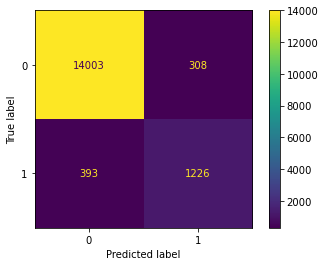

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, probas_test)
plt.show()

И в процентном соотношении:

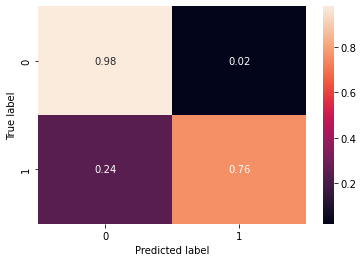

In [36]:
cm = confusion_matrix(y_test, probas_test)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show(block=False)

Как мы видим, наша модель обладает неплохим показателем точности (Precision) и приемлемым показателем полноты (Recall).

### Проверка на адекватность

Проверим на адекватность нашу модель. Построим модель-пустышку, которая предсказывает всё время 1:

In [37]:
%%time

dummy_1 = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', DummyClassifier(strategy='constant', constant=1))])

dummy_1.fit(X_train, y_train)

print()


CPU times: user 4.28 s, sys: 44 ms, total: 4.33 s
Wall time: 4.32 s


In [38]:
predictions_1 = dummy_1.predict(X_test)
f1 = f1_score(y_test, predictions_1)

print(f'Модель-пустышка, предсказывающая 1 показала F1-меру на тестовом наборе данных - {f1}')

Модель-пустышка, предсказывающая 1 показала F1-меру на тестовом наборе данных - 0.18451193800216537


Очень низкая F1-мера у пустышки. Наша модель логистической регрессии адекватна.

---
**Вывод:** завершив этап тестирования модели, мы
- протестировали нашу лучшую модель логистической регрессии на тестовом наборе данных:
    - без настройки порога она показывает F1-меру 0.75;
    - с настройкой порога она показывает F1-меру 0.78;
- проверили нашу модель на адекватность; модель пустышка показала результат F1-меры 0.18 - наша модель логистической регрессии адекватна.

## Альтернатива  - модель BERT

Как альтернативу нашей модели TF-IDF, попробуем модель BERT, предобученную для выявления токсичных комментариев.

Предскажем ответы для 1000 сэмплов из нашего полного набора данных.

In [39]:
model_path = "martin-ha/toxic-comment-model"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

pipeline =  TextClassificationPipeline(model=model, tokenizer=tokenizer)


test_bert = df.sample(1000, weights='toxic', random_state=random_state)


y_pred = []
for text in notebook.tqdm(test_bert['text']):
    pred = pipeline(text[:512])
    y_pred.append(1 if pred[0]['label'] == 'toxic' else 0)

  0%|          | 0/1000 [00:00<?, ?it/s]

Посмотрим, какую F1-меру покажет нам модель BERT:

In [40]:
f1_bert = f1_score(test_bert['toxic'], y_pred)
print(f'Модель BERT показала F1-меру {f1_bert} на сэмплированном наборе данных.')

Модель BERT показала F1-меру 0.7261146496815287 на сэмплированном наборе данных.


Что ж, показатель не дотягивает до минимума в 0.75, но будем учитывать, что это всего лишь 1000 строк, а не полный датасет, на котором могли бы быть совсем другие цифры.

Как альтернатива для моделей TF-IDF, BERT вполне могла бы справиться с нашей задачей.

## Общий вывод

Отвечая сразу на главный вопрос проекта: для определения токсичных комментариев мы предлагаем использовать обученную нами модель логистической регрессии с настроенным порогом классификации 0.71 для определения класса "1": она показывает результат **F1-меры 0.78 на тестовом наборе данных.**

В целом, в ходе проекта:

- завершив этап подготовки данных, мы
    - не обнаружили в данных пропуски;
    - проверили данные на дубликаты - их нет;
    - создали 4 новых признака с помощью SentimentIntensityAnalyzer, оценивающие настроение текста;
    - лемматизировали и очистили текст от спецсимволов;
    - визуализировали облака слов для токсичных и нетоксичных комментариев;
    - разбили данные на обучающую, валидационную и тестовую выборки в соотношении 8:1:1;
    - приняли решение векторизовывать наш текст методикой TF-IDF в pipeline'е.
    
    
- завершив этап обучения, мы
    - подготовили preprocessing-шаг для преобразования текстов в вектора методикой TF-IDF в pipeline'е;
    - обучили модели логистической регрессии и градиентного бустинга, собрав необходимые статистики;
    - выбрали лучшую модель - логистическую регрессию, по причинам наилучших результатов f1-меры - 0.76 и ROC-AUC - 0.91 на валидационном наборе данных и из-за того, что логистическая регрессия имеет отличный потенциал экстраполяции;
    - настроили порог (threshold) для предсказаний класса "1" на валидационном наборе данных; f1-мера повысилась на 4 процента до 0.80 при пороге, равном 0.71.
    
    
- завершив этап тестирования модели, мы
    - протестировали нашу лучшую модель логистической регрессии на тестовом наборе данных:
        - без настройки порога она показывает F1-меру 0.75;
        - с настройкой порога она показывает F1-меру 0.78;
    - проверили нашу модель на адекватность; модель пустышка показала результат F1-меры 0.18 - наша модель логистической регрессии адекватна.
    

- в качестве альтернативы, мы опробовали модель BERT, предобученную для выявления токсичных комментариев; на сэмплированном наборе данных из 1000 строк BERT показала F1-меру 0.73.